<a href="https://colab.research.google.com/github/fakhruddinarif/machine-learning/blob/main/RecurrentNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Praktikum 1**

In [1]:
# Import Packages
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Setup
tfds.disable_progress_bar()

def plot_graphs(history, metric="accuracy"):
  plt.plot(history.history[metric])
  plt.plot(history.history["val_" + metric], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, "val_" + metric])

In [3]:
# Setup input pipeline
dataset, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

train_dataset.element_spec

for example, label in train_dataset.take(1):
  print("text: ", example.numpy())
  print("label: ", label.numpy())

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
  print("texts: ", example.numpy()[:3])
  print()
  print("labels: ", label.numpy()[:3])

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
texts:  [b'In Canadian director Kari Skogland\'s film adaptation of the Margaret Laurence novel The Stone Angel Ellen Burstyn 

In [4]:
# Buat Teks Encoder
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

encoded_example = encoder(example)[:3].numpy()
encoded_example

for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'In Canadian director Kari Skogland\'s film adaptation of the Margaret Laurence novel The Stone Angel Ellen Burstyn is Hagar Shipley, a proud and cantankerous woman approaching her nineties who wishes to remain independent until the very end, stubbornly refusing to be placed in a nursing home by her well-meaning son Marvin. Filmed in Manitoba, Canada and set in the fictional town of Manawaka, The Stone Angel is a straightforward and conventional interpretation of the book that has been required reading in Canadian high school English classes for almost half a century.<br /><br />The title of the film comes from the stone statue erected on Hagar\'s mother\'s grave which serves as a metaphor for Hagar\'s inability to express emotion during her tumultuous lifetime. Burstyn brings vulnerability and humor to the role but is a bit too likable to fully realize the ego-driven, self-defeating character who managed to alienate her wealthy father, her well-meaning but alcoholic husban

In [5]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

print([layer.supports_masking for layer in model.layers])

# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(tf.constant([sample_text]))
print(predictions[0])

# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(tf.constant([sample_text, padding]))
print(predictions[0])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

[False, True, True, True, True]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[-0.00301236]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
[-0.00301237]


In [6]:
# Train Model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.5184 - loss: 0.6796 - val_accuracy: 0.7693 - val_loss: 0.4598
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.7742 - loss: 0.4617 - val_accuracy: 0.8422 - val_loss: 0.3913
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.8405 - loss: 0.3737 - val_accuracy: 0.8531 - val_loss: 0.3274
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.8523 - loss: 0.3435 - val_accuracy: 0.8344 - val_loss: 0.3514
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 747s 2s/step - accuracy: 0.8620 - loss: 0.3279 - val_accuracy: 0.8599 - val_loss: 0.3265
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.8695 - loss: 0.3148 - val_accuracy: 0.8281 - val_loss: 0.3527
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.8657 - loss: 0.3178 - val_accuracy: 0.8583 - val_loss: 0.3177
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 743s 2s/step - accuracy: 0.8701 - loss: 0.3101 - val_accu

391/391 ━━━━━━━━━━━━━━━━━━━━ 157s 401ms/step - accuracy: 0.8581 - loss: 0.3159
Test Loss: 0.31520316004753113
Test Accuracy: 0.8590800166130066


(0.0, 0.6434319034218788)

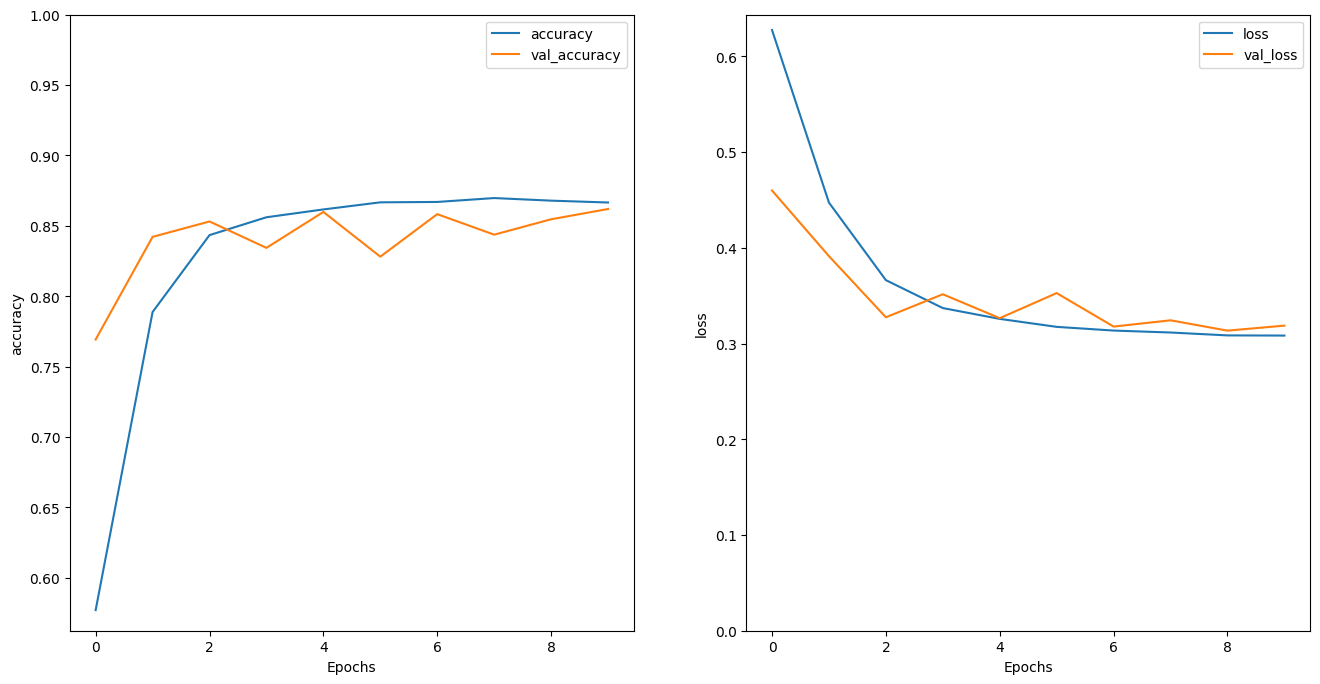

In [7]:
# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
# Predict new sentence
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(tf.constant([sample_text]))

# Stack two or more LSTM layers
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(tf.constant([sample_text]))
print(predictions)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')